<a href="https://colab.research.google.com/github/arunoda/fastai-v4/blob/master/02_3_cats_and_logs_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Production Model

Here we are trying to train a model and export it for inference purpose.
We can use that model in a production enviroment. (via CPU)


In [1]:
!pip install fastai2 > /dev/null 2>&1
!git clone https://github.com/arunoda/fastai-v4 > /dev/null 2>&1
%cd fastai-v4

/content/fastai-v4


In [0]:
from fastai2.vision.all import *

## Loading Dataset

Here we use the pets dataset.

In [0]:
data_path = untar_data(URLs.PETS)

In [5]:
data_path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
im_path = (data_path/"images")
im_path.ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_99.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_36.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_108.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_188.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_228.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_120.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_74.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_52.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/British_Shorthair_223.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_177.jpg')...]

In [43]:
def get_label(p):
  return ["cat"] if p.name[0].isupper() else ["dog"]
get_label(im_path.ls()[0])

['dog']

In [0]:
db = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(0.3),
    get_y=get_label,
    #presizing
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)

In [45]:
dls = db.dataloaders(im_path)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


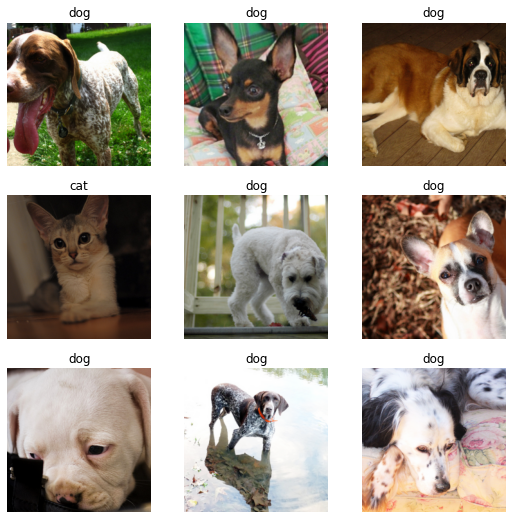

In [46]:
dls.show_batch()

## Train the Model

In [0]:
accuracy_multi

In [0]:
learn = cnn_learner(dls, resnet34, metrics=partial(accuracy_multi, thresh=0.999))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


SuggestedLRs(lr_min=0.014454397559165954, lr_steep=0.0008317637839354575)

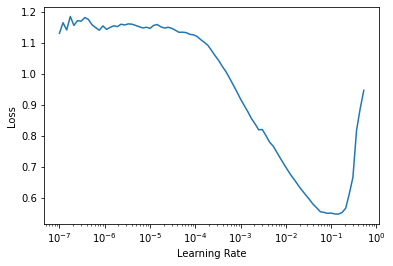

In [94]:
learn.lr_find()

In [119]:
learn.fine_tune(8, base_lr=1e-3, wd=0.2)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.261009,0.023700,0.693956,01:00


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.047731,0.008686,0.863103,01:02
1,0.029773,0.009220,0.926026,01:02
2,0.026870,0.008077,0.956473,01:02
3,0.022076,0.012976,0.957375,01:02
4,0.015517,0.007229,0.955345,01:02
5,0.011898,0.007644,0.975417,01:02
6,0.010164,0.004975,0.975192,01:02
7,0.008320,0.004753,0.971358,01:01


In [121]:
learn.fine_tune(2, base_lr=1e-3, wd=0.4)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.006528,0.004352,0.974515,01:01


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.008282,0.010162,0.973162,01:02
1,0.010652,0.006913,0.974966,01:02


## Export the Model

In [0]:
from google.colab import drive

In [33]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
outdir = Path("/content/drive/My Drive/fastai")
outdir.mkdir(exist_ok=True)

In [0]:
learn.export(outdir/"cats-dogs.pkl")

## Load the Exported Model

In [0]:
learn2 = load_learner(outdir/"cats-dogs.pkl")

In [0]:
import requests

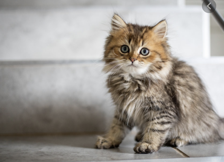

In [125]:
cat_image = PILImage.create(requests.get('https://i.imgur.com/UOEVgZ5.png', stream=True).raw)
cat_image.to_thumb(224)

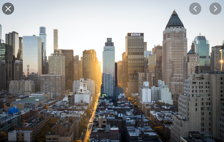

In [110]:
city_image = PILImage.create(requests.get('https://i.imgur.com/Z6RwdfU.png', stream=True).raw)
city_image.to_thumb(224)

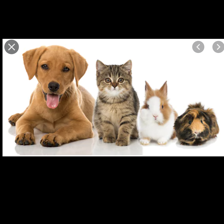

In [142]:
both_image = PILImage.create(requests.get('https://i.imgur.com/kNH1qnf.png', stream=True).raw)
both_image.to_thumb(224)

In [0]:
def predict(image):
  res = learn2.predict(image)
  probs = res[2]

  categories = np.array(['cat', 'dog'])
  return categories[probs > 0.995], probs

In [136]:
predict(cat_image)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


array(['cat'], dtype='<U3')

In [146]:
predict(city_image)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


(array([], dtype='<U3'), tensor([0.0183, 0.9820]))

In [145]:
predict(both_image)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


(array(['dog'], dtype='<U3'), tensor([0.0012, 0.9967]))